# K-Means

## Link to wikipedia

https://en.wikipedia.org/wiki/K-means_clustering

## Generate some data

# A tibble: 300 x 3
       x        y group
   <dbl>    <dbl> <dbl>
 1  2.21  0.0811   1.00
 2  2.50 -0.168    1.00
 3  2.27  0.0942   1.00
 4  2.21 -0.294    1.00
 5  1.55 -0.267    1.00
 6  2.41 -0.00115  1.00
 7  2.00  0.0820   1.00
 8  2.20  0.0769   1.00
 9  1.96  0.365    1.00
10  1.65 -0.162    1.00
# ... with 290 more rows


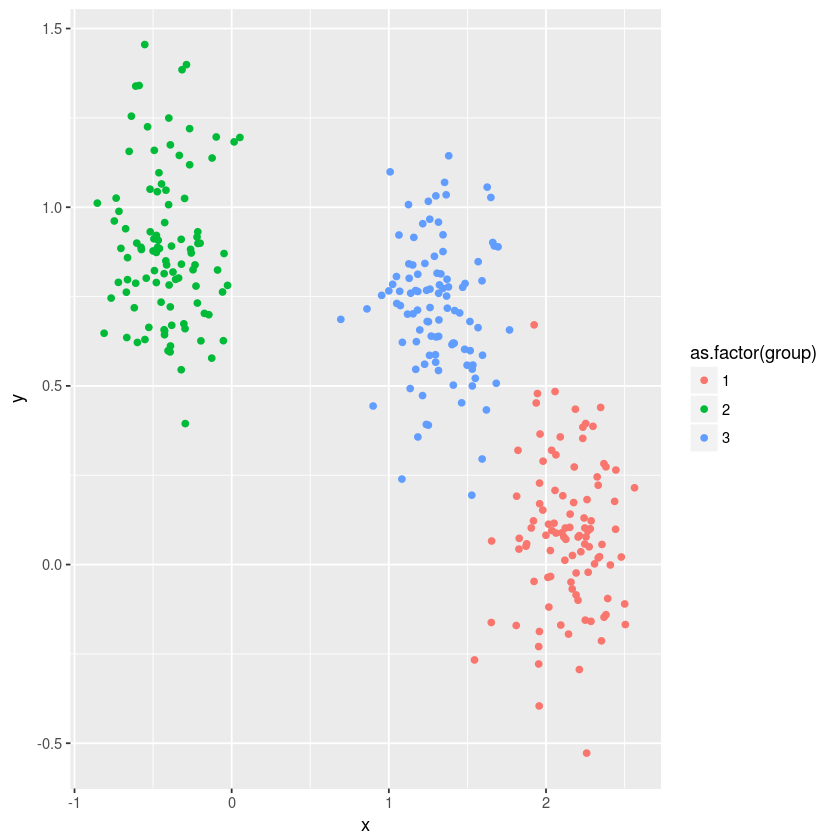

In [247]:
library(tidyverse)

create_cluster_data = function(k,n){ # k = number of clusters, n = points per cluster
    vector_size = k*n
    x = numeric(vector_size)
    y = numeric(vector_size)
    group = numeric(vector_size)
    
    for(i in 1:k){
        center_x = rnorm(1)
        center_y = rnorm(1)
        
        for(j in 1:n){
            index = (i-1)*n + j
            x[index] = rnorm(1,center_x,0.2)
            y[index] = rnorm(1,center_y,0.2)
            group[index] = i
        }
    }
    
    return(data.frame(x = x, y = y, group = group))
}

# create test data
data = create_cluster_data(3,100)
print(data %>% as_tibble)

# plot output
ggplot(data,aes(x=x,y=y)) + geom_point(aes(colour = as.factor(group)))

# Lloyd's Algorithm to Find Clusters

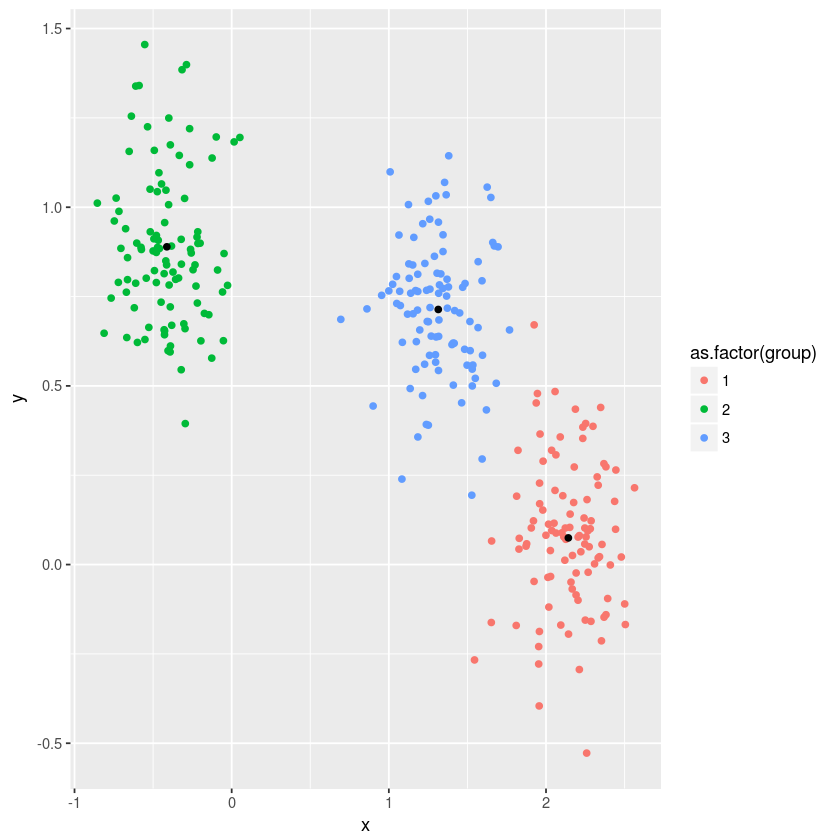

In [257]:
dist = function(x1,x2,y1,y2){
    sqrt((x2 - x1)^2 + (y2 - y1)^2)
}

solve_k_means = function(data,k){
    # choose random initial centroids
    min_x = min(data$x)
    max_x = max(data$x)
    min_y = min(data$y)
    max_y = max(data$y)
    
    centroids = data.frame(x = runif(k,min_x,max_x), y = runif(k,min_y,max_y))
    
    repeat {
        # assign each data point to its closest centroid
        n = nrow(data)
        groups = numeric(n)
        for(i in 1:n){
            groups[i] = which.min(apply(centroids,1,function(row){
                dist(row[1],data[i,1],row[2],data[i,2])
            }))
        }
        
        # calculate new centroids
        new_centroids_x = numeric(k)
        new_centroids_y = numeric(k)
        for(i in 1:length(unique(groups))){
            g = unique(groups)[i]
            which_data = which(groups == g)
            new_centroids_x[i] = mean(data[which_data,1])
            new_centroids_y[i] = mean(data[which_data,2])
        }
        new_centroids = data.frame(x = new_centroids_x, y = new_centroids_y)
        
        # if centroids didn't change, break
        if(all(centroids$x == new_centroids$x) && all(centroids$y == new_centroids$y)){ 
            break
        }
        
        centroids = new_centroids
    }
    centroids
}

centroids = solve_k_means(data,3)
#print(centroids %>% as_tibble)

ggplot(data,aes(x=x,y=y)) + geom_point(aes(colour = as.factor(group))) + geom_point(data=centroids,aes(x=x,y=y))

## K-Medians

Instead of using the mean, we can use the median instead, and this is called k-medians clustering.

https://en.wikipedia.org/wiki/K-medians_clustering

R uses first class functions, so we can pass either __mean__ or __median__ to the k-means function.

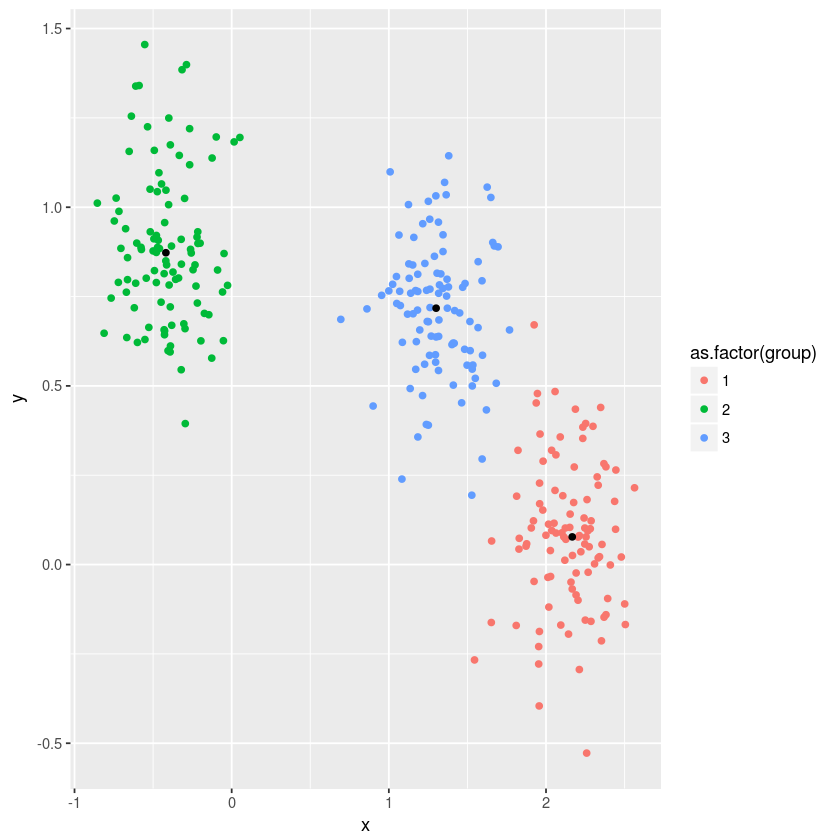

In [249]:
solve_k_clust = function(data,k,minimizer=mean){
    # choose random initial centroids
    min_x = min(data$x)
    max_x = max(data$x)
    min_y = min(data$y)
    max_y = max(data$y)
    
    centroids = data.frame(x = runif(k,min_x,max_x), y = runif(k,min_y,max_y))
    
    repeat {
        # assign each data point to its closest centroid
        n = nrow(data)
        groups = numeric(n)
        for(i in 1:n){
            groups[i] = which.min(apply(centroids,1,function(row){
                dist(row[1],data[i,1],row[2],data[i,2])
            }))
        }
        
        # calculate new centroids
        new_centroids_x = numeric(k)
        new_centroids_y = numeric(k)
        for(i in 1:length(unique(groups))){
            g = unique(groups)[i]
            which_data = which(groups == g)
            new_centroids_x[i] = minimizer(data[which_data,1])
            new_centroids_y[i] = minimizer(data[which_data,2])
        }
        new_centroids = data.frame(x = new_centroids_x, y = new_centroids_y)
        
        # if centroids didn't change, break
        if(all(centroids$x == new_centroids$x) && all(centroids$y == new_centroids$y)){ 
            break
        }
        
        centroids = new_centroids
    }
    centroids
}

centroids = solve_k_clust(data,3,median)
#print(centroids %>% as_tibble)

ggplot(data,aes(x=x,y=y)) + geom_point(aes(colour = as.factor(group))) + geom_point(data=centroids,aes(x=x,y=y))

# Distance with Arbitrary Dimensions

In [250]:
dist_arb = function(v1,v2) {
    sqrt(sum((v1-v2)^2))
}

dist_arb(data[1,],data[2,])
sqrt((data[1,1] - data[2,1])^2 + (data[1,2] - data[2,2])^2)

[1] 0.3841654

[1] 0.3841654

# Silhouette

In this section we demonstrate the usage of something called the **silhouette**. As wikipedia says:

>  The technique provides a succinct graphical representation of how well each object lies within its cluster.

(See link here: https://en.wikipedia.org/wiki/Silhouette_(clustering))

## Definition

Let $a(i)$ be the average distance between point $i$ and other points in the same cluster, and $b(i)$ be the smallest average distance to another cluster of which $i$ is not a member. Then the **silhouette** is defined as:

$s(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$

In [251]:
print(centroids %>% as_tibble)

# A tibble: 3 x 2
       x      y
   <dbl>  <dbl>
1  2.17  0.0774
2  1.30  0.717 
3 -0.419 0.873 


In [252]:
print(data %>% as_tibble)

# A tibble: 300 x 3
       x        y group
   <dbl>    <dbl> <dbl>
 1  2.21  0.0811   1.00
 2  2.50 -0.168    1.00
 3  2.27  0.0942   1.00
 4  2.21 -0.294    1.00
 5  1.55 -0.267    1.00
 6  2.41 -0.00115  1.00
 7  2.00  0.0820   1.00
 8  2.20  0.0769   1.00
 9  1.96  0.365    1.00
10  1.65 -0.162    1.00
# ... with 290 more rows


## Silhouette Function

The first thing I will do is to find which cluster each point is closest to. Note that although `data` already has a group column, that is the true groups, which we would normally not know.

In [253]:
data = data %>% mutate(closest_group = apply(data,1,function(row) { 
    which.min(apply(centroids,1,function(crow){
        dist_arb(row[-3],crow)
    }))
}))

Now we write the silhouette function:

In [254]:
silhouette = function(data) {
    apply(data,1,function(row){
        avg_dists = sapply(sort(unique(data$closest_group)),function(group_i) {
            mean(apply(data %>% filter(closest_group == group_i),1,function(group_row) {
                dist_arb(row[1:2],group_row[1:2])
            }))
        })
        
        closest_group_index = row[which(names(row) == "closest_group")]
        a_i = avg_dists[closest_group_index]
        b_i = min(avg_dists[-closest_group_index])

        (b_i - a_i) / max(a_i,b_i)
    })
}

s = silhouette(data)

s_data = data %>% mutate(silhouette = s)

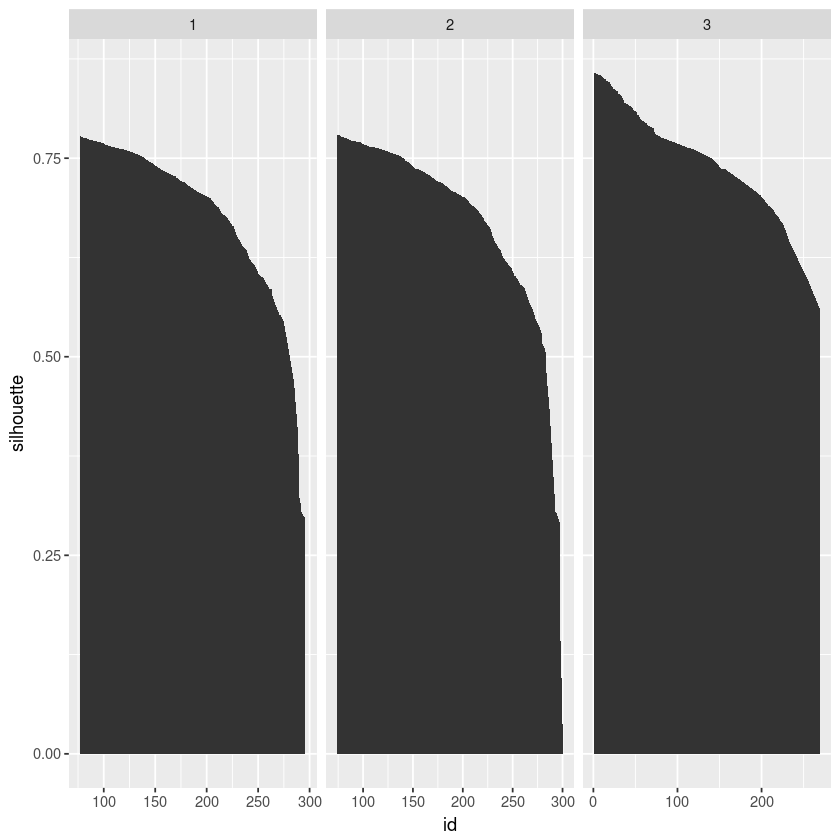

In [263]:
plot_data = s_data %>% arrange(desc(silhouette)) %>% mutate(id=1:nrow(s_data))
ggplot(plot_data,aes(id,silhouette)) + geom_area(position="identity") + facet_grid(.~closest_group,scale="free")



# K-means++

https://en.wikipedia.org/wiki/K-means%2B%2B

In [314]:
d = faithful %>% mutate(x = eruptions, y = waiting)

In [300]:
kpp = function(data,k) {
    centroids = numeric(k)
    
    # assign first centroid at random from points
    centroids[1] = sample(1:nrow(data),1)
    
    for(i in 2:k) {
        # For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen
        d_x = apply(data,1,function(row){
            # find closest center
            d_to_centers = sapply(centroids[1:(i-1)],function(center) {
                dist_arb(row,data[center,])
            })
            min(d_to_centers)
        })
        
        # Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)^2.   
        probs = d_x^2 / sum(d_x)
        zero_prob = which(d_x == 0)
        centroids[i] = sample(seq_along(probs)[-zero_prob],1,prob=probs[-zero_prob])
    }

    return(centroids)
}

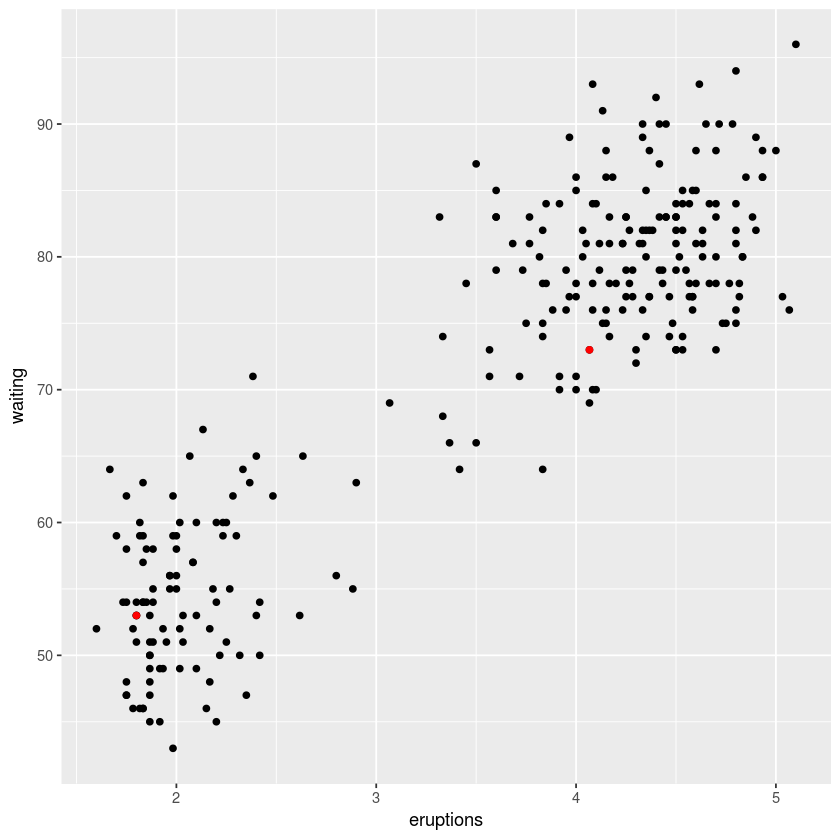

In [311]:
centers = d[kpp(d,2),]

ggplot(faithful,aes(x=eruptions,y=waiting)) + geom_point() + geom_point(data=centers,colour="red")

# K-means||

http://vldb.org/pvldb/vol5/p622_bahmanbahmani_vldb2012.pdf

In [332]:
# first, kmeans++ with arbitrary weights in args
kpp = function(data,k,weights=NULL) {
    centroids = numeric(k)
    
    # assign first centroid at random from points
    centroids[1] = sample(1:nrow(data),1)
    
    for(i in 2:k) {
        # For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen
        if(is.null(weights)){
            weights = apply(data,1,function(row){
                # find closest center
                d_to_centers = sapply(centroids[1:(i-1)],function(center) {
                    dist_arb(row,data[center,])
                })
                min(d_to_centers)
            })
        }
        
        # Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)^2.   
        probs = weights^2 / sum(weights)
        zero_prob = (weights > 0)
        centroids[i] = sample(seq_along(probs)[-zero_prob],1,prob=probs[-zero_prob])
    }

    return(centroids)
}

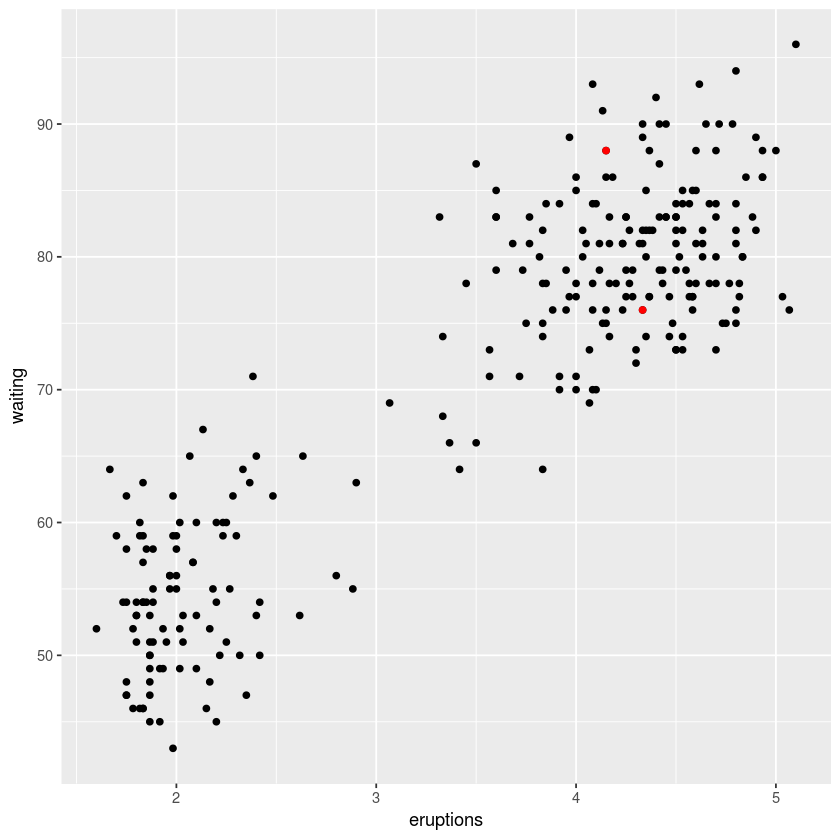

In [333]:
centers = d[kpp(d,2,rep(1,nrow(d))),]

ggplot(faithful,aes(x=eruptions,y=waiting)) + geom_point() + geom_point(data=centers,colour="red")

In [ ]:
# k-means parallel
kmeanspar = function(data,k){
    # choose an initial center at random
    
    # get the cost phi of choosing this center
    
    # for log(cost) iterations
    #   pick a new center, based on weights: d^2(x -> C) / phi(C)
    
    # for every center chosen, set the weight: 
    # the number of points in the data that are closer to the center than any other center
    
    # run kmeans++ on these centers using the weights from the previous part
}